In [154]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
from astropy.io import fits
from astropy.wcs import WCS
from astropy.utils.console import ProgressBar
import warnings
import math
warnings.filterwarnings('ignore')

Calculate the spectrum as you did for the X-ray spectrum in Problem Set #1, but now include
the effect of possible charge pile-up from average photon arrival rates of one per 1, 10, 100, and
1000 μs,

In [155]:
data = pd.read_csv('charge.dat')

In [156]:
def pileup_vec(vector):

    dat_index = 0
    pileup = []
    for i in range(len(vector)):

        # break the loop if you ran out of charges
        if dat_index == 1999.:
             break

        # if the distribution says 0, then there is no charge or pileup
        if vector[i] == 0:
            pileup.append(0)

        # if there is a nonzero number there, then do the sum
        else:

            summ = 0. # the sum is zero first
            j = vector[i] # grab the value of the Poisson distribution
            for j in range(1,j+1): # this starts the indexing at 1 and goes to j

                # break the loop if you ran out of charges (this will have to also be done in the outer loop)
                if dat_index+j == 1999.:
                    dat_index == 1999.
                    break

                summ = summ + float(np.array(data)[dat_index+j]) # sum the next j data counts

            pileup.append(summ) # add this to the pileup vector
            dat_index = (dat_index + j) # change the data index by j
            
    return(pileup)

In [242]:
pileup_1    = pileup_vec(np.random.poisson(1.,1000000))       # average value of 1; 1 million draws
pileup_10   = pileup_vec(np.random.poisson(1/10.,1000000))    # average value of 1/10; 1 million draws
pileup_100  = pileup_vec(np.random.poisson(1/100.,1000000))   # average value of 1/100; 1 million draws
pileup_1000 = pileup_vec(np.random.poisson(1/1000.,10000000)) # average value of 1/1000; 10 million draws

In [229]:
# get spectral index
def get_alpha(pileup):
    
    hist = np.histogram(pileup,bins=np.arange(1,10,0.1))
    y = hist[0]
    x = hist[1]
    
    for i in range(len(hist[0])):
        if y[i] == 0:
            y[i] = 1.
        else:
            continue

    return(np.polyfit(np.log(x[0:20]),np.log(y[0:20]),deg=1)[0]+0.3)

alpha = get_alpha(data)
alpha1 = get_alpha(pileup_1)
alpha10 = get_alpha(pileup_10)
alpha100 = get_alpha(pileup_100)
alpha1000 = get_alpha(pileup_1000)

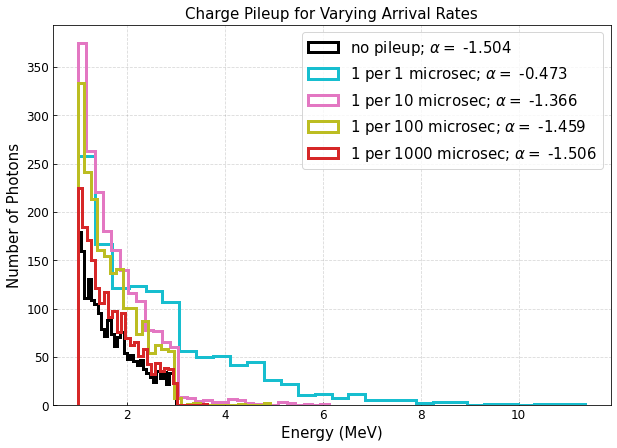

In [245]:
fig, ax = plt.subplots(figsize=(10,7))
plt.hist(data, bins=30,color='black',histtype='step',lw=3,label='no pileup; $\\alpha =$ %s' % round(alpha,3))
plt.hist([i for i in pileup_1 if i != 0], bins=30,color='tab:cyan',histtype='step',lw=3,
         label='1 per 1 microsec; $\\alpha =$ %s' % round(alpha1,3))
plt.hist([i for i in pileup_10 if i != 0], bins=30,color='tab:pink',histtype='step',lw=3,
         label='1 per 10 microsec; $\\alpha =$ %s' % round(alpha10,3))
plt.hist([i for i in pileup_100 if i != 0], bins=30,color='tab:olive',histtype='step',lw=3,
         label='1 per 100 microsec; $\\alpha =$ %s' % round(alpha100,3))
plt.hist([i for i in pileup_1000 if i != 0], bins=30, color='tab:red',histtype='step',lw=3,
         label='1 per 1000 microsec; $\\alpha =$ %s' % round(alpha1000,3))
ax.tick_params(axis='x',direction='in',labelsize=12)
ax.tick_params(axis='y',direction='in',labelsize=12)
plt.xlabel('Energy (MeV)', fontsize=15)
plt.ylabel('Number of Photons',fontsize=15)
plt.grid('major',color='gray',linestyle='--',alpha=0.3)
plt.title('Charge Pileup for Varying Arrival Rates',fontsize=15)

plt.legend(fontsize=15)
plt.show()

The spectral index for each case can be found in the legend of the plot above. It is apparent that as the pileup of charges occurs at lower and lower rates, the spectral index approaches -1.5, which is the spectral index of the no-pileup case (i.e., the case from HW #1). One can also see this visually in the plot above, where the red histogram (the 1 per 1000 microsecond case) is approaching the black histogram (the no pile-up case). This is because at a rate of 1/1000 microseconds, there is barely any pileup effect, whereas at a rate of 1 photon per microsecond, there is a very noticeable pileup effect. In terms of detector reset rate (i.e., how often you read out), the higher the photon arrival rate, the faster you would need the detector reset rate. At such a low rate of 1 photon per 1000 microseconds, you would not need to read out as often.